In [1]:
!unzip '/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [2]:
!unzip '/content/train.zip'
!unzip '/content/test1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from glob import glob
from PIL import Image
import cv2
from tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer

In [4]:
train_data_path = '/content/train'
train_image_path = glob(train_data_path + '/*.jpg')

In [5]:
print(train_image_path)

['/content/train/dog.2200.jpg', '/content/train/dog.7226.jpg', '/content/train/dog.11782.jpg', '/content/train/cat.5461.jpg', '/content/train/cat.11551.jpg', '/content/train/dog.2869.jpg', '/content/train/dog.10235.jpg', '/content/train/dog.4468.jpg', '/content/train/cat.1704.jpg', '/content/train/dog.8292.jpg', '/content/train/cat.3686.jpg', '/content/train/cat.4919.jpg', '/content/train/dog.10252.jpg', '/content/train/cat.2395.jpg', '/content/train/cat.6294.jpg', '/content/train/cat.4454.jpg', '/content/train/cat.8964.jpg', '/content/train/dog.9081.jpg', '/content/train/dog.2376.jpg', '/content/train/cat.10924.jpg', '/content/train/dog.3823.jpg', '/content/train/dog.5210.jpg', '/content/train/dog.1217.jpg', '/content/train/cat.1315.jpg', '/content/train/cat.9811.jpg', '/content/train/cat.6067.jpg', '/content/train/cat.7851.jpg', '/content/train/dog.1736.jpg', '/content/train/cat.10816.jpg', '/content/train/dog.11652.jpg', '/content/train/dog.4336.jpg', '/content/train/dog.10031.jpg',

In [6]:
names = []
labels = []

for path in train_image_path:
  name= path.split('/content/train/')[1]
  names.append(name)
  labels.append(name.split('.')[0])

In [7]:
print(names[0:5])
print(labels[0:5])

['dog.2200.jpg', 'dog.7226.jpg', 'dog.11782.jpg', 'cat.5461.jpg', 'cat.11551.jpg']
['dog', 'dog', 'dog', 'cat', 'cat']


In [8]:
train_dataset = {"path":train_image_path,"name":names,"label":labels}
print(train_dataset)

{'path': ['/content/train/dog.2200.jpg', '/content/train/dog.7226.jpg', '/content/train/dog.11782.jpg', '/content/train/cat.5461.jpg', '/content/train/cat.11551.jpg', '/content/train/dog.2869.jpg', '/content/train/dog.10235.jpg', '/content/train/dog.4468.jpg', '/content/train/cat.1704.jpg', '/content/train/dog.8292.jpg', '/content/train/cat.3686.jpg', '/content/train/cat.4919.jpg', '/content/train/dog.10252.jpg', '/content/train/cat.2395.jpg', '/content/train/cat.6294.jpg', '/content/train/cat.4454.jpg', '/content/train/cat.8964.jpg', '/content/train/dog.9081.jpg', '/content/train/dog.2376.jpg', '/content/train/cat.10924.jpg', '/content/train/dog.3823.jpg', '/content/train/dog.5210.jpg', '/content/train/dog.1217.jpg', '/content/train/cat.1315.jpg', '/content/train/cat.9811.jpg', '/content/train/cat.6067.jpg', '/content/train/cat.7851.jpg', '/content/train/dog.1736.jpg', '/content/train/cat.10816.jpg', '/content/train/dog.11652.jpg', '/content/train/dog.4336.jpg', '/content/train/dog.10

In [9]:
df_train_dataset = pd.DataFrame(train_dataset)
print(df_train_dataset.head(10))

                           path           name label
0   /content/train/dog.2200.jpg   dog.2200.jpg   dog
1   /content/train/dog.7226.jpg   dog.7226.jpg   dog
2  /content/train/dog.11782.jpg  dog.11782.jpg   dog
3   /content/train/cat.5461.jpg   cat.5461.jpg   cat
4  /content/train/cat.11551.jpg  cat.11551.jpg   cat
5   /content/train/dog.2869.jpg   dog.2869.jpg   dog
6  /content/train/dog.10235.jpg  dog.10235.jpg   dog
7   /content/train/dog.4468.jpg   dog.4468.jpg   dog
8   /content/train/cat.1704.jpg   cat.1704.jpg   cat
9   /content/train/dog.8292.jpg   dog.8292.jpg   dog


Data Pre-processing (to be ready for the model)

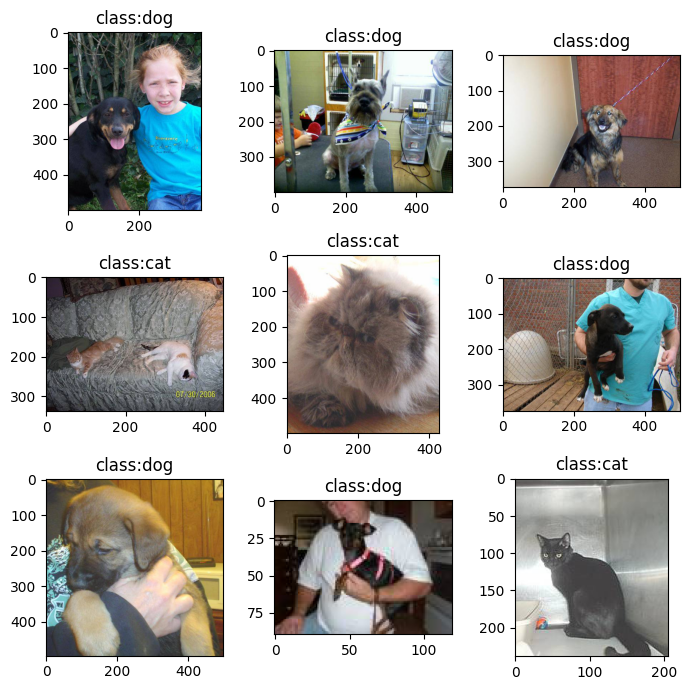

In [10]:
plt.figure(figsize=(7,7))

for i in range(0,9):
  plt.subplot(3,3,i+1)
  plt.imshow(Image.open(df_train_dataset['path'].loc[i]))
  plt.title("class:{}".format(df_train_dataset['label'].loc[i]))

plt.tight_layout()

In [11]:
resized_train_images = []

for path in tqdm(df_train_dataset["path"]):
  resized_train_images.append(cv2.resize(cv2.imread(path),(100,100)).astype("float16")/255)


'''
resized_train_image = []
for path in tqdm(df_train_dataset['path']):
  read_pic = cv2.imread(path)
  resized_pic = cv2.resize(read_pic , (100,100))
  resized_pic = resized_pic / 255
  resized_train_image.append(resized_pic)
'''

100%|██████████| 25000/25000 [01:13<00:00, 338.84it/s]


"\nresized_train_image = []\nfor path in tqdm(df_train_dataset['path']):\n  read_pic = cv2.imread(path)\n  resized_pic = cv2.resize(read_pic , (100,100))\n  resized_pic = resized_pic / 255\n  resized_train_image.append(resized_pic)\n"

In [12]:
print(resized_train_images[0].shape)

(100, 100, 3)


In [13]:
print(resized_train_images[0][0][0],resized_train_images[0][0][99])
print(type(resized_train_images))
print(len(resized_train_images))

[0.396  0.443  0.4392] [0.0902 0.1412 0.0784]
<class 'list'>
25000


In [14]:
y_train = list(df_train_dataset['label'])
print(type(y_train))

<class 'list'>


In [15]:
label_binarizer = LabelBinarizer()
categorical_labels = label_binarizer.fit_transform(y_train)
print(categorical_labels)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


In [16]:
print(categorical_labels[0])
print(categorical_labels[0][0])
print(type(categorical_labels))

[1]
1
<class 'numpy.ndarray'>


In [17]:
x_train = resized_train_images
print(len(x_train))

25000


Train the model

In [18]:
y_train = categorical_labels
x_train = np.array(x_train)
print(x_train.shape)
print(y_train.shape)

(25000, 100, 100, 3)
(25000, 1)


In [19]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(100,100,3)),
        tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation="relu"),
        #tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation = "sigmoid"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

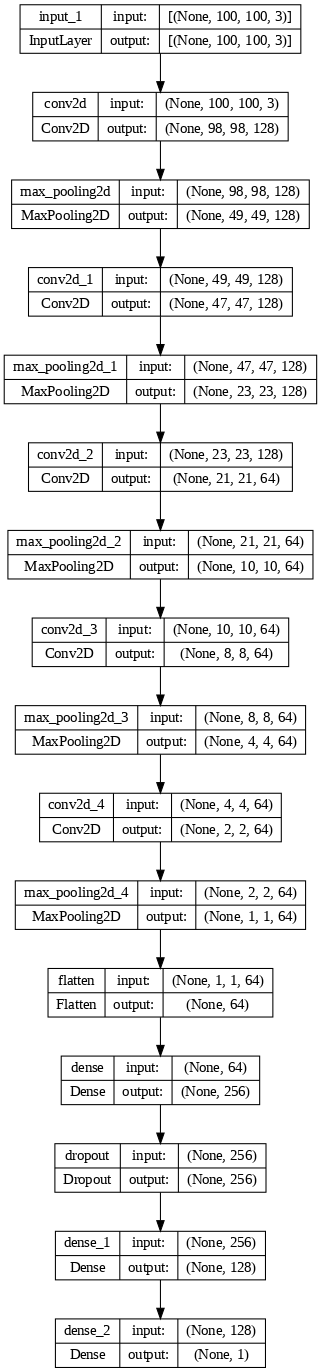

In [20]:
tf.keras.utils.plot_model(model=model,show_shapes=True,dpi=76)

In [21]:
epoch = 10
batch_size = 128
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer="adam", metrics=["accuracy"])

In [22]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 36s 117ms/step - loss: 0.6778 - accuracy: 0.5564 - val_loss: 0.6024 - val_accuracy: 0.6808
Epoch 2/10
176/176 [==============================] - 17s 96ms/step - loss: 0.5736 - accuracy: 0.7033 - val_loss: 0.6049 - val_accuracy: 0.7104
Epoch 3/10
176/176 [==============================] - 17s 97ms/step - loss: 0.4896 - accuracy: 0.7642 - val_loss: 0.4279 - val_accuracy: 0.7908
Epoch 4/10
176/176 [==============================] - 17s 97ms/step - loss: 0.4035 - accuracy: 0.8176 - val_loss: 0.4037 - val_accuracy: 0.8172
Epoch 5/10
176/176 [==============================] - 17s 97ms/step - loss: 0.3353 - accuracy: 0.8544 - val_loss: 0.3167 - val_accuracy: 0.8592
Epoch 6/10
176/176 [==============================] - 17s 97ms/step - loss: 0.2835 - accuracy: 0.8808 - val_loss: 0.3108 - val_accuracy: 0.8644
Epoch 7/10
176/176 [==============================] - 17s 98ms/step - loss: 0.2464 - accuracy: 0.8958 - val_loss: 0.2947 - val_accuracy

In [23]:
def plot_graphs(fitted_model, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()


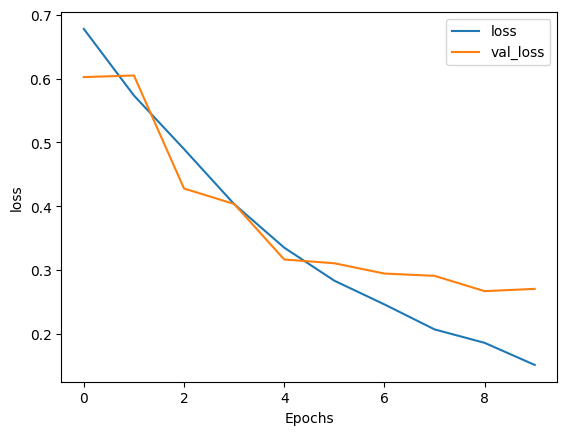

In [24]:
plot_graphs(fitted_model=history, metric='loss')

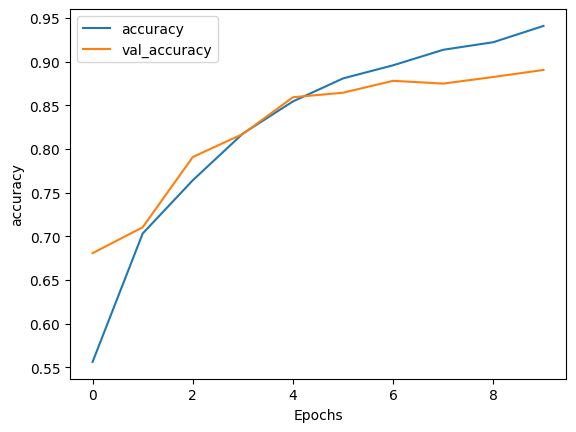

In [25]:
plot_graphs(fitted_model = history, metric = 'accuracy')

Prediction x_test (no evaluation)

In [26]:
from tensorflow.keras.models import Sequential, save_model, load_model
filepath = './saved_model'
save_model(model, filepath)

# Load the model
model = load_model(filepath, compile = True)

In [27]:
test_data_path = '/content/test1'
test_image_path = glob(test_data_path + '/*.jpg')

In [28]:
print(test_image_path)
print(len(test_image_path))
test_image_path_0_9 = test_image_path [0:10]
print(len(test_image_path_0_9))

['/content/test1/9971.jpg', '/content/test1/4236.jpg', '/content/test1/4691.jpg', '/content/test1/12247.jpg', '/content/test1/9932.jpg', '/content/test1/2090.jpg', '/content/test1/9953.jpg', '/content/test1/3032.jpg', '/content/test1/1588.jpg', '/content/test1/3583.jpg', '/content/test1/10151.jpg', '/content/test1/9618.jpg', '/content/test1/2390.jpg', '/content/test1/10501.jpg', '/content/test1/10558.jpg', '/content/test1/542.jpg', '/content/test1/982.jpg', '/content/test1/1676.jpg', '/content/test1/973.jpg', '/content/test1/8652.jpg', '/content/test1/1202.jpg', '/content/test1/9765.jpg', '/content/test1/7232.jpg', '/content/test1/10357.jpg', '/content/test1/1883.jpg', '/content/test1/53.jpg', '/content/test1/11367.jpg', '/content/test1/7200.jpg', '/content/test1/2326.jpg', '/content/test1/6549.jpg', '/content/test1/5871.jpg', '/content/test1/7308.jpg', '/content/test1/7497.jpg', '/content/test1/10646.jpg', '/content/test1/9989.jpg', '/content/test1/7965.jpg', '/content/test1/5532.jpg'

In [29]:
resized_test_data =[]

for path in tqdm(test_image_path[0:10]):
  resized_test_data.append(cv2.resize(cv2.imread(path),(100,100)).astype("float16")/255)
'''
test_data = []
for path in tqdm(test_image_path):
  test_data.append(cv2.imread(path).astype("float16")/255)
'''



100%|██████████| 10/10 [00:00<00:00, 158.72it/s]


'\ntest_data = []\nfor path in tqdm(test_image_path):\n  test_data.append(cv2.imread(path).astype("float16")/255)\n'

In [30]:
x_test_0_9 = np.array(resized_test_data)
print(x_test_0_9.shape)

(10, 100, 100, 3)


In [31]:
predicted_class = model.predict(x_test_0_9)
print(predicted_class)

1/1 [==============================] - 0s 415ms/step
[[1.6813076e-04]
 [2.5190628e-01]
 [9.7899103e-01]
 [9.7940069e-01]
 [9.9508238e-01]
 [3.0324182e-01]
 [3.9052940e-04]
 [9.7789472e-01]
 [2.9527293e-06]
 [2.5188468e-08]]


In [32]:
for example in predicted_class:
  if example >= 0.5:
    selected_class = "dog"
  else:
    selected_class = "cat"
  print(selected_class)

cat
cat
dog
dog
dog
cat
cat
dog
cat
cat


In [33]:
def class_title(test_image_num, predicted_class):
  if predicted_class[test_image_num-1] >= 0.5:
    selected_class = "dog"
  else:
    selected_class = "cat"
  return selected_class

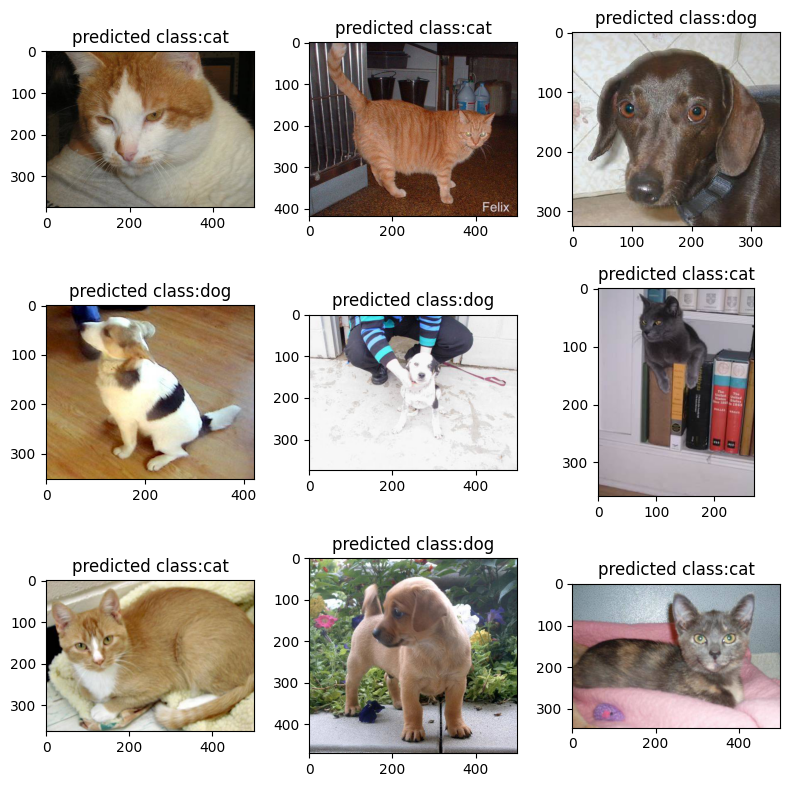

In [34]:
plt.figure(figsize=(8, 8))

for i in range(0,9):
  plt.subplot(3,3,i+1)
  test_image_num = i+1
  plt.imshow(Image.open(test_image_path_0_9[i]))
  plt.title("predicted class:{}".format(class_title(test_image_num , predicted_class)))

plt.tight_layout()